In [3]:
import numpy as np
import pandas as pd
import yfinance
import yfinance as yf
import matplotlib.pyplot as mplt
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [4]:
# Volatilidade-BTC-USD
data = yfinance.download(
    tickers = 'BTC-USD',
    start="2008-01-01",
    end="2021-08-20",
    interval = '1d',
    treads = False
)

data['LogReturn'] = np.log(data['Close']
                            / data['Close'].shift(1))
data['Volatility'] =  data['LogReturn'].rolling(21).std() * np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn,Volatility
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.074643,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.072402,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035111,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024968,NaN


In [6]:
ativo = data.rename({"Volatility":"Volatilidade-BTC-USD"}, axis=1)
ativo.drop('Open', axis = 1, inplace=True)
ativo.drop('High', axis = 1, inplace=True)
ativo.drop('Low', axis = 1, inplace=True)
ativo.drop('Close', axis = 1, inplace=True)
ativo.drop('Volume', axis = 1, inplace=True)
ativo.drop('LogReturn', axis = 1, inplace=True)
ativo.drop('Adj Close', axis = 1, inplace=True)
#ativo

In [13]:
#ativo.plot();

In [7]:
# Volatilidade-USDBRL
data1 = yfinance.download(
    tickers = 'USDBRL=X',
    start="2008-01-01",
    end="2021-08-20",
    interval = '1d',
    treads = False
)

data1['LogReturn'] = np.log(data1['Close']
                            / data['Close'].shift(1))
data1['Volatility'] =  data1['LogReturn'].rolling(21).std() * np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


In [8]:
data1.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn,Volatility
Date,,,,,,,,
2008-01-01,1.7673,1.7673,1.7673,1.7673,1.7673,0,NaN,NaN
2008-01-02,1.7760,1.7822,1.7560,1.7645,1.7645,0,NaN,NaN
2008-01-03,1.7645,1.7684,1.7480,1.7480,1.7480,0,NaN,NaN
2008-01-04,1.7480,1.7665,1.7391,1.7572,1.7572,0,NaN,NaN
2008-01-07,1.7615,1.7777,1.7451,1.7640,1.7640,0,NaN,NaN


In [9]:
ativo1 = data1.rename({"Volatility":"Volatilidade-USD-BRL"}, axis=1)
ativo1.drop('Open', axis = 1, inplace=True)
ativo1.drop('High', axis = 1, inplace=True)
ativo1.drop('Low', axis = 1, inplace=True)
ativo1.drop('Close', axis = 1, inplace=True)
ativo1.drop('Volume', axis = 1, inplace=True)
ativo1.drop('LogReturn', axis = 1, inplace=True)
ativo1.drop('Adj Close', axis = 1, inplace=True)
#ativo1

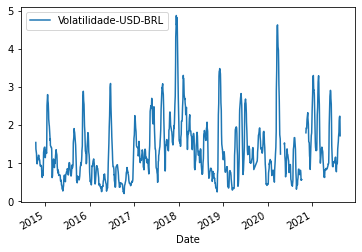

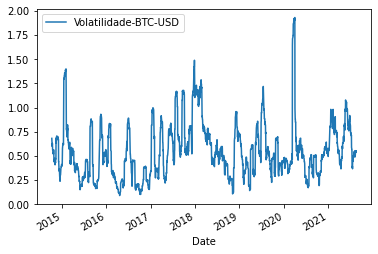

In [10]:
ativo1.plot();
ativo.plot();

[*********************100%***********************]  2 of 2 completed


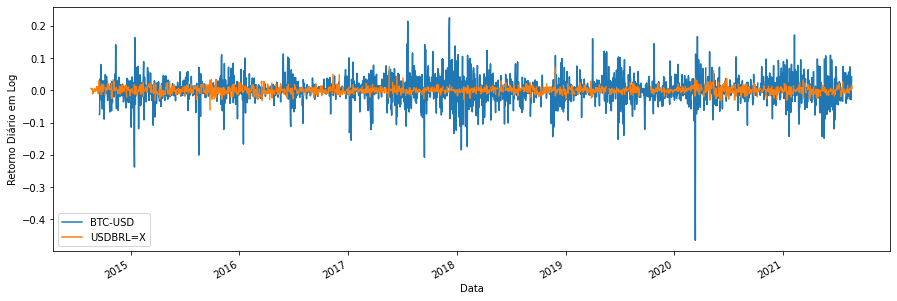

BTC-USD     0.039558
USDBRL=X    0.011267
dtype: float64

In [12]:
# Comparativo dos retornos diários do Bitcoin em relação ao dólar.
tickers = "	 BTC-USD USDBRL=X "
serie = yf.download(tickers=tickers, period="7y")['Adj Close']
#preços = pd.DataFrame()
#serie.plot()
ret = serie.pct_change()
#retornos = dados.pct_change()
#ret
log_retorno=np.log(serie/serie.shift(1))
log_retorno.plot(figsize=(15,5))
plt.ylabel('Retorno Diário em Log')
plt.xlabel('Data')
plt.show()
#Volatilidade diária
log_retorno.std()